<font size="4">Eigenfaces Decomposition For Reddit /r/rateme Faces Database</font>

In [1]:
import pickle
import numpy as np
import pandas
import sklearn.decomposition
import matplotlib.pyplot as plt

In [2]:
# loading in the data
with open('./data/female_faces_3000', 'rb') as f:
    faces, rating_age = pickle.load(f)
# separating rating and age into different arrays
rating, age = rating_age[:, 0], rating_age[:, 1]
# constants
num_faces, width, height, channels = faces.shape

Visualising the images

In [3]:
# separating images into 3 channels
faces_r = faces[...,0].reshape(-1, width, height)
faces_g = faces[...,1].reshape(-1, width, height)
faces_b = faces[...,2].reshape(-1, width, height)

# forming grayscale images
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
faces_grayscale = np.array(list(map(rgb2gray, faces)))

In [4]:
def plot_image_grid(grid, images, labels=None, figsize=(12, 6), cmap=None):
    '''
    Draw ``images`` in a grid of dimension ``grid``
    Input:
        grid: tuple of integers, grid dimensions
        images: list of images (array or PIL), |images| == |grid|
        labels: list of objects that can be printed, |labels| == |images|
    '''
    # fill with dummy labels if none provided
    if not labels:
        labels = [''] * images.shape[0]
        
    f, axarr = plt.subplots(*grid, figsize=figsize)
    # clearing the axis from plot
    for ax in axarr.flat:
        ax.set(xticks=[], yticks=[])
        
    curr_row = 0; w, h = grid
    for i, image_label in enumerate(zip(images, labels)):
        image, label = image_label
        # find the column by taking the current index modulo 3
        col = i % w
        # plot on relevant subplot
        axarr[col, curr_row].imshow(image, cmap=cmap)
        axarr[col, curr_row].set(xlabel=label) 
        
        if col == w-1:
            # we have finished the current row, so increment row counter
            curr_row += 1

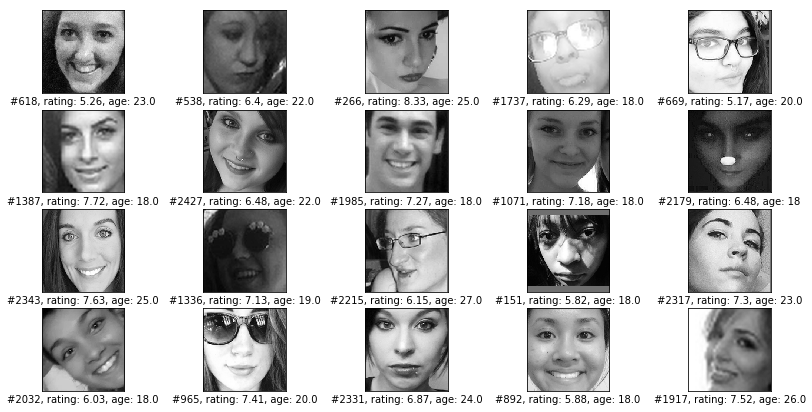

In [5]:
# taking a random sample of images
grid = (4, 5)
w, h = grid
sample = np.random.choice(num_faces, w*h, replace=False)
image_sample = faces_grayscale[sample]
label_sample = ['#{}, rating: {}, age: {}'.format(i, np.round(rating[i], 2), age[i]) 
                for i in sample]

plt.clf()
plot_image_grid(grid, image_sample, label_sample, figsize=(14,7), cmap='gray')
plt.show()

Performing PCA

In [6]:
# running PCA on dataset
pca = sklearn.decomposition.PCA(n_components=250)
pca.fit(faces_grayscale.reshape(-1, width*height))

PCA(copy=True, iterated_power='auto', n_components=250, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

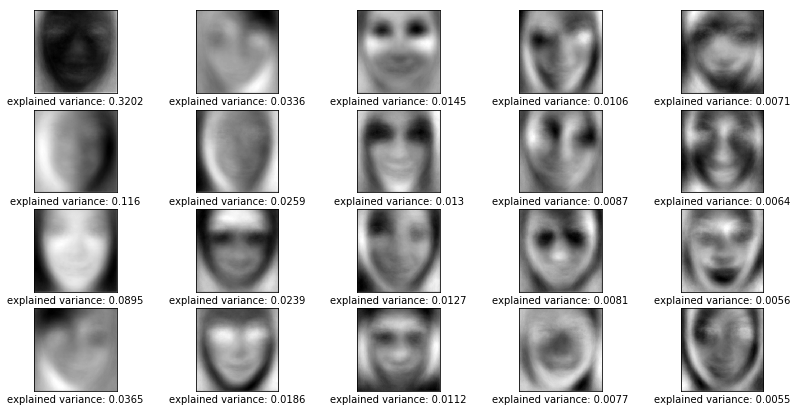

In [11]:
# visualising the eigenfaces
components = pca.components_[:20]
eigenfaces = components.reshape(-1, width, height)
evrs = ['explained variance: {}'.format(evr)
        for evr in np.round(pca.explained_variance_ratio_[:20], 4)]

# plotting on a grid
plt.clf()
plot_image_grid((4, 5), eigenfaces, evrs, figsize=(14, 7), cmap='gray')
plt.show()

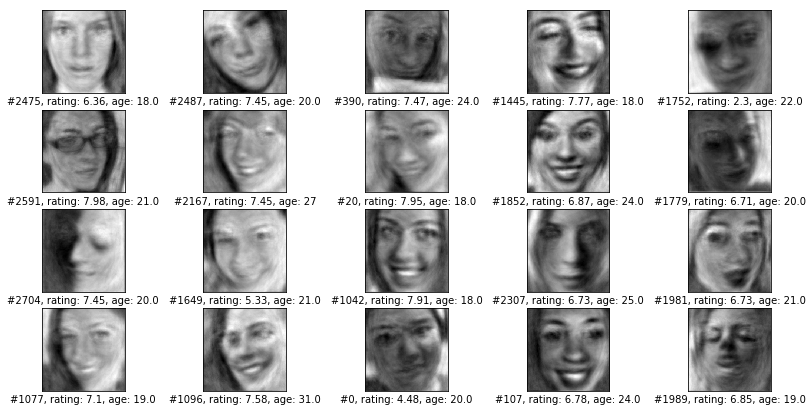

In [8]:
# visualising the information captured by these components
# taking a random sample
grid = (4, 5)
w, h = grid
sample = np.random.choice(num_faces, w*h, replace=False)
sample_faces = faces_grayscale[sample]

# reconstruct the sample using PCA vectors
pca_coefficients = pca.transform(sample_faces.reshape(-1, width*height))
pca_sample = pca.components_.T.dot(pca_coefficients.T).T.reshape(-1, width, height)
label_sample = ['#{}, rating: {}, age: {}'.format(i, np.round(rating[i], 2), age[i]) 
                for i in sample]

# plotting reconstructed sample on a grid
plt.clf()
plot_image_grid((4, 5), pca_sample, label_sample, figsize=(14,7), cmap='gray')
plt.show()